In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "anxiety-depression-data"

In [2]:
###Loading necessary libraries and importing the dataset
# install.packages("ggplot2","readr","dplyr")
library(ggplot2)
library(readr)
library(dplyr)
###Exploring the structure and contents of data
data<-read.csv("/kaggle/input/anxiety-depression-data/anxiety_depression_data.csv",stringsAsFactors = FALSE)
head(data)
colnames(data)
str(data)
sum(is.na(data))

  

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,⋯,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,⋯,0,None,0,1,None,4,3,7,5,1
2,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,⋯,0,None,1,0,None,1,4,7,4,6
3,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,⋯,0,None,0,1,None,8,7,8,1,1
4,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,⋯,1,None,0,0,None,7,4,8,4,4
5,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,⋯,0,None,1,1,Frequent,8,9,5,7,7
6,25,Male,Other,Student,4.4,2.8,7,15,1,1,⋯,0,Occasional,0,0,Occasional,1,7,1,4,6


[1] "Age"                           "Gender"                       
 [3] "Education_Level"               "Employment_Status"            
 [5] "Sleep_Hours"                   "Physical_Activity_Hrs"        
 [7] "Social_Support_Score"          "Anxiety_Score"                
 [9] "Depression_Score"              "Stress_Level"                 
[11] "Family_History_Mental_Illness" "Chronic_Illnesses"            
[13] "Medication_Use"                "Therapy"                      
[15] "Meditation"                    "Substance_Use"                
[17] "Financial_Stress"              "Work_Stress"                  
[19] "Self_Esteem_Score"             "Life_Satisfaction_Score"      
[21] "Loneliness_Score"

'data.frame':	1200 obs. of  21 variables:
 $ Age                          : int  56 69 46 32 60 25 38 56 36 40 ...
 $ Gender                       : chr  "Male" "Female" "Female" "Female" ...
 $ Education_Level              : chr  "Bachelor's" "Bachelor's" "Master's" "High School" ...
 $ Employment_Status            : chr  "Unemployed" "Retired" "Employed" "Unemployed" ...
 $ Sleep_Hours                  : num  6 8.8 5.3 8.8 7.2 4.4 7.1 3.3 7.4 7.8 ...
 $ Physical_Activity_Hrs        : num  0.4 2.8 1.6 0.5 0.7 2.8 1.3 0.5 6.8 2.5 ...
 $ Social_Support_Score         : int  3 6 5 4 2 7 5 4 8 9 ...
 $ Anxiety_Score                : int  4 18 5 6 7 15 1 4 1 11 ...
 $ Depression_Score             : int  2 7 13 3 15 1 3 10 15 6 ...
 $ Stress_Level                 : int  9 6 8 4 3 1 7 4 8 3 ...
 $ Family_History_Mental_Illness: int  0 0 0 1 0 0 0 1 0 0 ...
 $ Chronic_Illnesses            : int  0 0 0 1 0 0 0 1 1 0 ...
 $ Medication_Use               : chr  "None" "None" "None" "None" ...
 $ T

[1] 0

In [3]:
###Exaimining distribution of categorical variables
table(data$Gender)
table(data$Education_Level)
table(data$Employment_Status)


    Female       Male Non-Binary      Other 
       569        520         90         21 


 Bachelor's High School    Master's       Other         PhD 
        214         242         242         240         262 


  Employed    Retired    Student Unemployed 
       320        282        310        288 

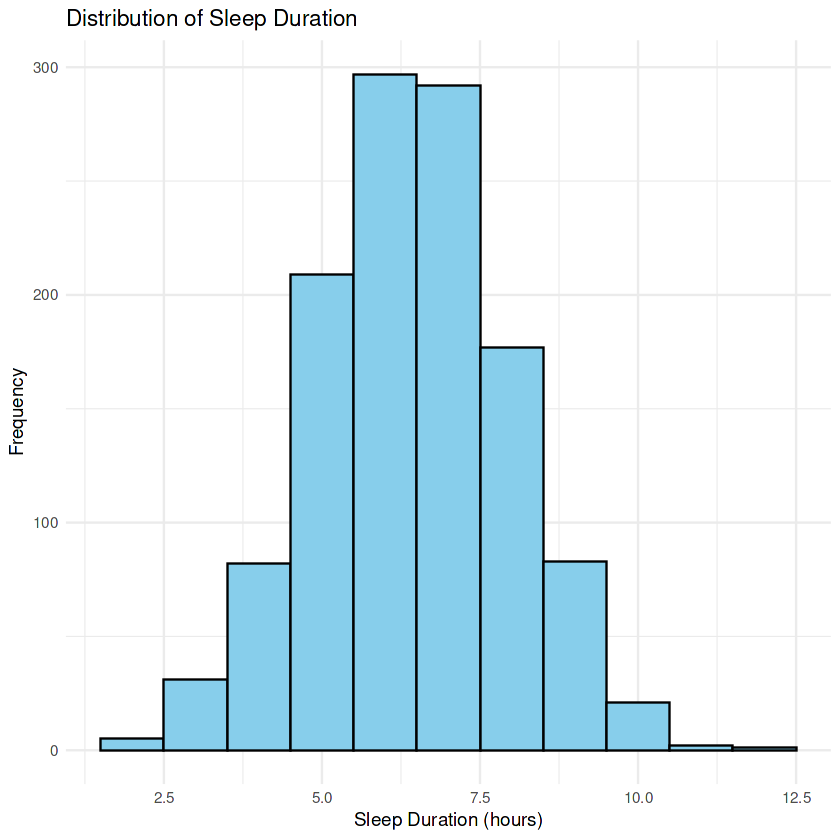

In [4]:
###Visualizing the distribution of sleep duration
ggplot(data,aes(x=Sleep_Hours))+
  geom_histogram(aes(x=Sleep_Hours),binwidth = 1,fill="skyblue",color="black")+
  labs(title = "Distribution of Sleep Duration",
       x="Sleep Duration (hours)",
       y="Frequency")+
  theme_minimal()

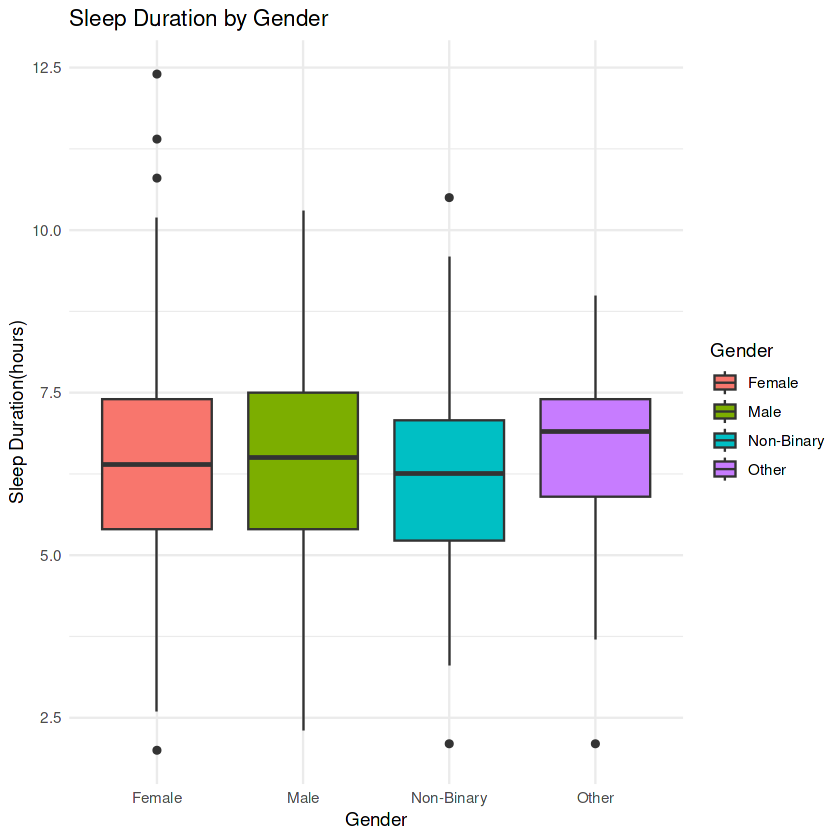

In [5]:
###Comparing sleep duration by gender
ggplot(data,aes(x=Gender,y=Sleep_Hours,fill=Gender))+
  geom_boxplot()+
  labs(title="Sleep Duration by Gender",
       x="Gender",
       y="Sleep Duration(hours)")+
  theme_minimal()

In [6]:
###Creating age groups for further analysis
data<-data %>%
  mutate(Age_Group=cut(Age,breaks=c(0,20,35,50,65,100),
                       labels=c("0-20","21-35","36-50","51-65","65+")))

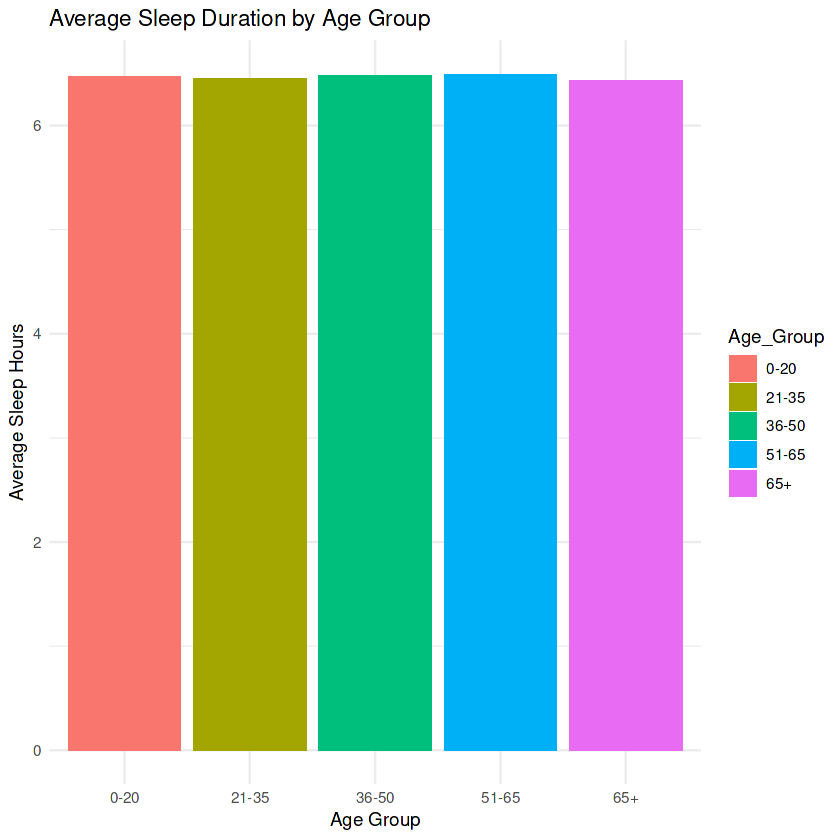

In [7]:
###Bar Chart: Average Sleep Duration by Age Group
data %>%
  group_by(Age_Group) %>%
  summarise(Average_Sleep=mean(Sleep_Hours,na.rm=TRUE)) %>%
  ggplot(aes(x=Age_Group,y=Average_Sleep,fill = Age_Group))+
  geom_bar(stat = "identity")+
  labs(title="Average Sleep Duration by Age Group",
       x="Age Group",
       y="Average Sleep Hours")+
  theme_minimal()

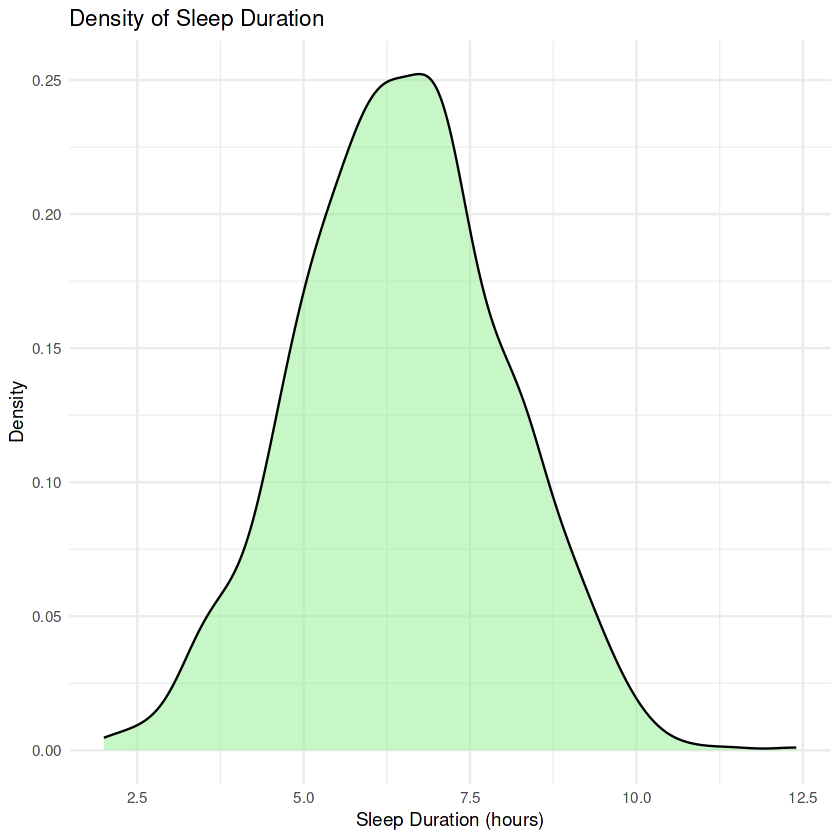

In [8]:
###Density Plot of Sleep Duration
ggplot(data,aes(x=Sleep_Hours))+
  geom_density(fill="lightgreen",alpha=0.5)+
  labs(title="Density of Sleep Duration",
       x="Sleep Duration (hours)",
       y="Density")+
  theme_minimal()

corrplot 0.92 loaded



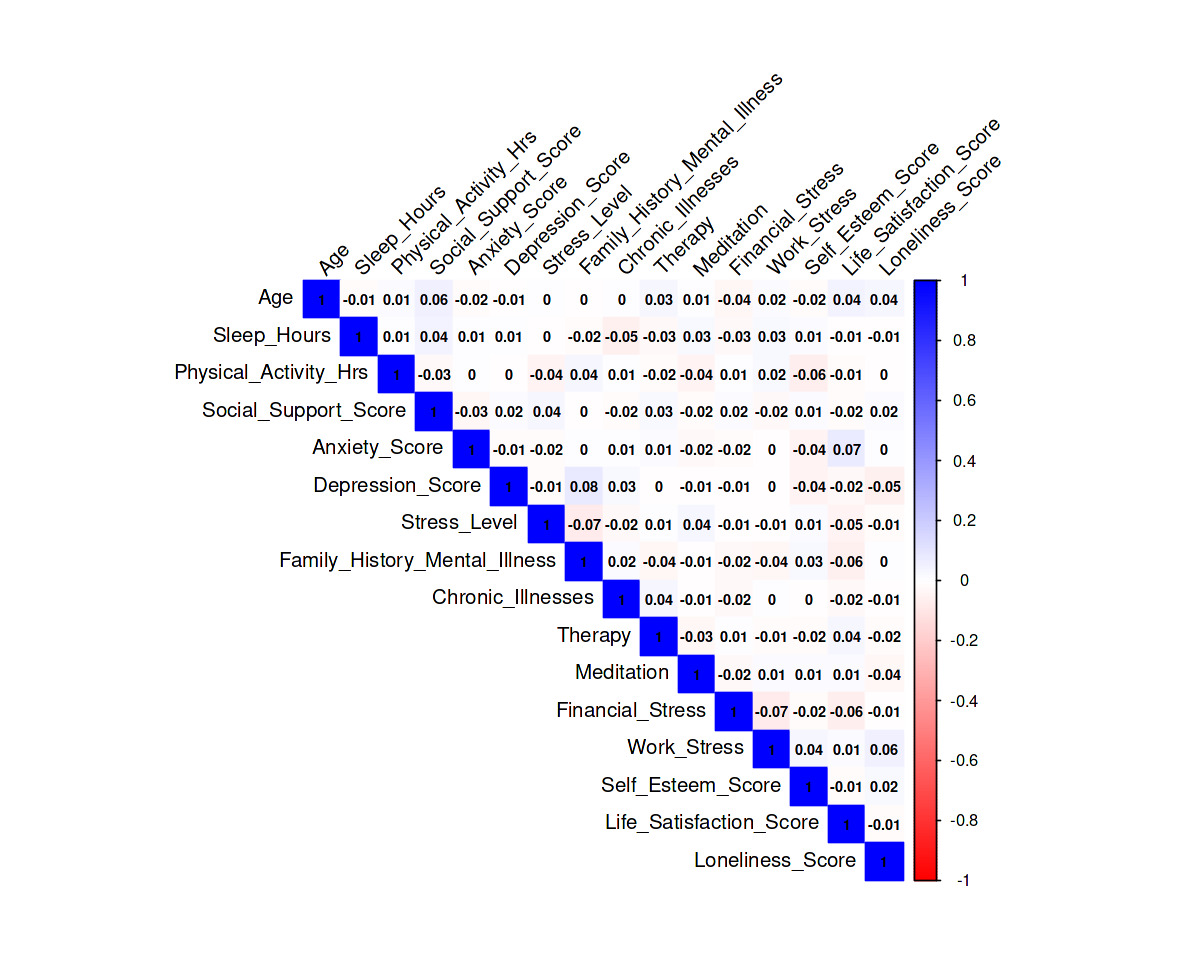

In [9]:
###Correlation Matrix for Numeric Variables
library(corrplot)
numeric_data<-data %>% select(where(is.numeric))
cor_matrix<-cor(numeric_data,use = "complete.obs")
options(repr.plot.width=10,repr.plot.height=8)
col<-colorRampPalette(c("red","white","blue"))(200)
corrplot(cor_matrix,method = "color",type = "upper",col = col,tl.col = "black",tl.srt = 45,addCoef.col = "black",number.cex = 0.7)

## Correlation Analysis – Summary of Findings

The correlation matrix shows that Anxiety and Depression scores are very strongly related — when one increases, the other tends to increase as well. This suggests that these two mental health outcomes often go hand in hand.

Anxiety also shows a strong connection with perceived stress, and moderate negative relationships with self-esteem, life satisfaction, and social support. These results suggest that higher stress levels may contribute to anxiety, while strong support systems and positive self-view can help reduce it.

Similarly, Depression is positively linked with stress, and negatively related to self-esteem and life satisfaction. People who are more satisfied with their lives and feel better about themselves tend to report lower levels of depression.

Overall, the analysis highlights the importance of personal well-being and support systems in mental health. It also underlines the role of stress as a risk factor for both anxiety and depression.